In [1]:
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

/Users/xy/.pyenv/versions/3.9.6/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
t = np.arange(256)
print(t)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

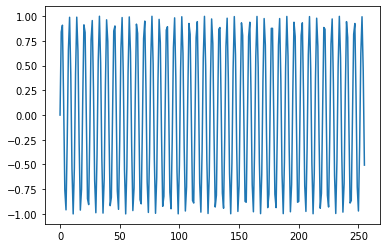

In [9]:
plt.plot(t, np.sin(t))
plt.show()

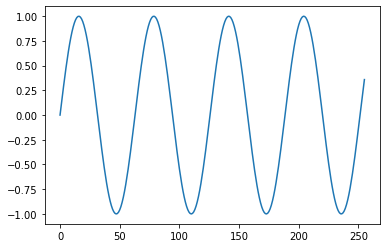

In [13]:
plt.plot(t, np.sin(0.1*t))
plt.show()

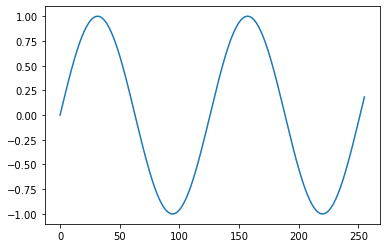

In [14]:
plt.plot(t, np.sin(0.05*t))
plt.show()

In [9]:
freq_unshifted = fftfreq(t.shape[-1])
print(freq_unshifted.shape)
freq_unshifted

(256,)


array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
        0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
        0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
        0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
        0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
        0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
        0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
        0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
        0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
        0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
        0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
        0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
        0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
        0.25390625,  0.2578125 ,  0.26171875,  0.265625  ,  0.26

In [10]:
freq = fftshift(fftfreq(t.shape[-1]))
print(freq.shape)
freq

(256,)


array([-0.5       , -0.49609375, -0.4921875 , -0.48828125, -0.484375  ,
       -0.48046875, -0.4765625 , -0.47265625, -0.46875   , -0.46484375,
       -0.4609375 , -0.45703125, -0.453125  , -0.44921875, -0.4453125 ,
       -0.44140625, -0.4375    , -0.43359375, -0.4296875 , -0.42578125,
       -0.421875  , -0.41796875, -0.4140625 , -0.41015625, -0.40625   ,
       -0.40234375, -0.3984375 , -0.39453125, -0.390625  , -0.38671875,
       -0.3828125 , -0.37890625, -0.375     , -0.37109375, -0.3671875 ,
       -0.36328125, -0.359375  , -0.35546875, -0.3515625 , -0.34765625,
       -0.34375   , -0.33984375, -0.3359375 , -0.33203125, -0.328125  ,
       -0.32421875, -0.3203125 , -0.31640625, -0.3125    , -0.30859375,
       -0.3046875 , -0.30078125, -0.296875  , -0.29296875, -0.2890625 ,
       -0.28515625, -0.28125   , -0.27734375, -0.2734375 , -0.26953125,
       -0.265625  , -0.26171875, -0.2578125 , -0.25390625, -0.25      ,
       -0.24609375, -0.2421875 , -0.23828125, -0.234375  , -0.23

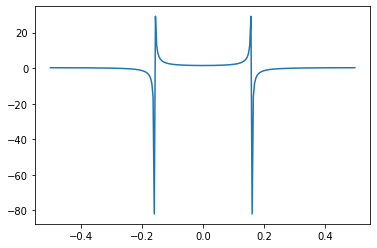

In [11]:
sp = fftshift(fft(np.sin(t)))
plt.plot(freq, sp.real)

In [12]:
print(1/(2*np.pi)) # 频率

0.15915494309189535


## Experiment with entropy series

In [2]:
input_file = '../data/webtext.test.model=gpt2.nll'
with open(input_file, 'r') as f:
    line = f.readline()
x = np.array(list(map(float, line.strip().split())))
print(x.shape)

(133,)


freq_x: (133,)
sp_x: (133,)


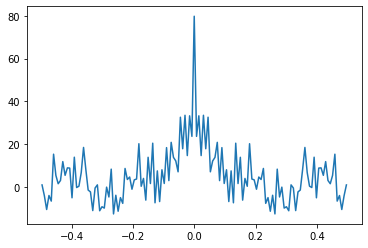

In [3]:
freq_x = fftshift(fftfreq(x.shape[-1]))
sp_x = fftshift(fft(x))
print('freq_x:', freq_x.shape)
print('sp_x:', sp_x.shape)
plt.plot(freq_x, sp_x.real)

/Users/xy/.pyenv/versions/3.9.6/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


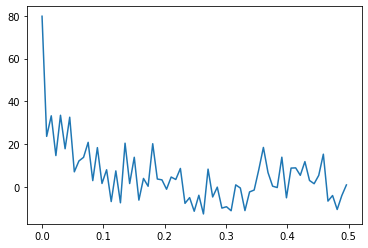

In [4]:
# If we only plot 0 to 1/2 (right half)
plt.plot(freq_x[len(freq_x)//2:], sp_x[len(sp_x)//2:])

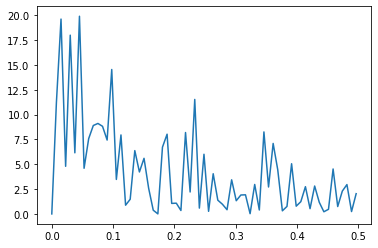

In [5]:
# Test signal.periodogram()
f, p = signal.periodogram(x)
plt.plot(f, p)

In [6]:
print(len(f))
print(len(p))

67
67


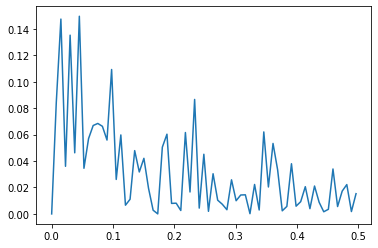

In [21]:
f, p = signal.periodogram(x, scaling='spectrum')
plt.plot(f, p)

In [3]:
# Improve the pipeline by including FFT method
def _read_data(data_file, N=np.inf):
    data = []
    with open(data_file, 'r') as f:
        count = 0
        for line in f:
            line = line.strip()
            num = list(map(float, line.split()))
            data.append(num)
            count += 1
            if count >= N:
                break
    return data

def compute_freqs_powers(data, method:str):
    freqs, powers = [], []
    for i in tqdm.tqdm(range(len(data))):
        if method == 'periodogram':
            f, p = signal.periodogram(data[i])
        elif method == 'fft':
            x = data[i]
            f_full = fftshift(fftfreq(x.shape[-1]))
            p_full = fftshift(fft(x))
            f = f_full[len(x)//2:]
            p = p_full[len(x)//2:]
        else:
            raise ValueError(f'Invalid value for `method`: {method}')
        freqs.append(f)
        powers.append(p)
    return freqs, powers

def fp_pipeline(data_file, N=np.inf, method:str='fft') -> pd.DataFrame:
    data_list = _read_data(data_file) # Read all data
    data_arr = np.concatenate([np.asarray(d) for d in data_list])
    mean_data = np.mean(data_arr)
    sd_data = np.std(data_arr)

    if N < np.inf:
        data_norm = [(np.asarray(d) - mean_data)/sd_data for d in data_list[:N]]
    else:
        data_norm = [(np.asarray(d) - mean_data)/sd_data for d in data_list]
    freqs, powers = compute_freqs_powers(data_norm, method)
    df = pd.DataFrame.from_dict({
        'freq': np.concatenate(freqs),
        'power': np.concatenate(powers)
    })
    return df

# 尝试对信息熵先进行归一化
## 1. 用句子长度对本句内的信息熵归一化


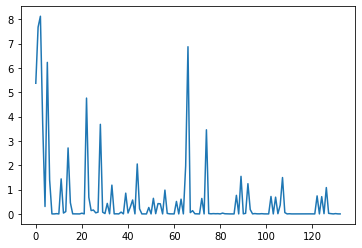

In [6]:
input_file = '../data/webtext.test.model=gpt2.nll'
with open(input_file, 'r') as f:
    line = f.readline()
x = np.array(list(map(float, line.strip().split())))

plt.plot(x)
plt.show()

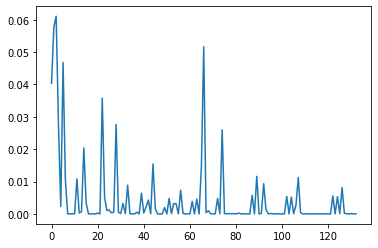

In [7]:
xn = x / len(x)
plt.plot(xn)
plt.show()

/Users/xy/.pyenv/versions/3.9.6/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


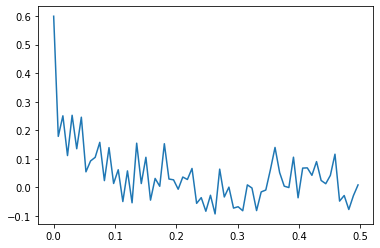

In [8]:
# FFT
freq_xn = fftshift(fftfreq(xn.shape[-1]))
sp_xn = fftshift(fft(xn))

plt.plot(freq_xn[len(freq_xn)//2:], sp_xn[len(sp_xn)//2:])
plt.show()

## 2. 用信息熵平均值归一化


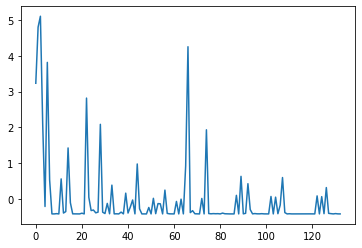

In [12]:
input_file = '../data/webtext.test.model=gpt2.nll'
with open(input_file, 'r') as f:
    line = f.readline()
x = np.array(list(map(float, line.strip().split())))

xn2 = (x - np.mean(x))/np.std(x)
plt.plot(xn2)
plt.show()

/Users/xy/.pyenv/versions/3.9.6/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


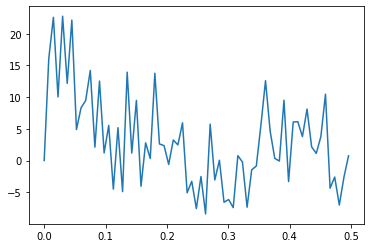

In [14]:
# FFT
freq_xn2 = fftshift(fftfreq(xn2.shape[-1]))
sp_xn2 = fftshift(fft(xn2))

plt.plot(freq_xn[len(freq_xn2)//2:], sp_xn[len(sp_xn2)//2:])
plt.show()

## 3. 先对信息熵进行对数转换，再用平局值归一化


/var/folders/0r/xy8f079x74n2hdcjzkf_v8q40000gr/T/ipykernel_60152/923294374.py:6: RuntimeWarning: divide by zero encountered in log2
  x_log = np.log2(x)


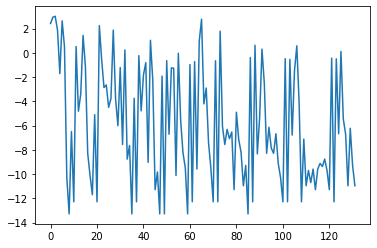

In [19]:
input_file = '../data/webtext.test.model=gpt2.nll'
with open(input_file, 'r') as f:
    line = f.readline()
x = np.array(list(map(float, line.strip().split())))

x_log = np.log2(x)
# -inf from x_log
x_log = x_log[np.isfinite(x_log)]

plt.plot(x_log)
plt.show()

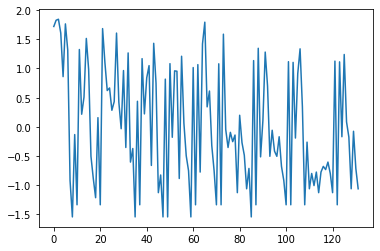

In [21]:
x_log_n = (x_log - np.mean(x_log)) / np.std(x_log)
plt.plot(x_log_n)
plt.show()

/Users/xy/.pyenv/versions/3.9.6/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


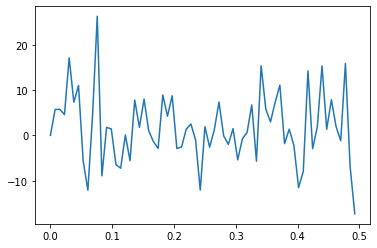

In [22]:
# FFT
freq_x = fftshift(fftfreq(x_log_n.shape[-1]))
sp_x = fftshift(fft(x_log_n))

plt.plot(freq_x[len(freq_x)//2:], sp_x[len(sp_x)//2:])
plt.show()

# 归一化的信息熵更接近噪声了 -- 频谱趋平